<a href="https://colab.research.google.com/github/favourphilic/Supervised_MachineLearning/blob/main/StartUps_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Profit prediction using a dataset contaning information about 50 startups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MyFolder/DataSet/kaggle/LinearRegression/50_Startups (1).csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* The dataset is labelled(i.e, it has the profit we want to determine in the *dataset*), therefore, it is a supervised learning task.

In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* the dataset dose not contain any missing values, however, the column "state" is of and object class i.e its a string

In [7]:
#Let's take a look at the state column
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f511d701d50>,
      dtype=object)

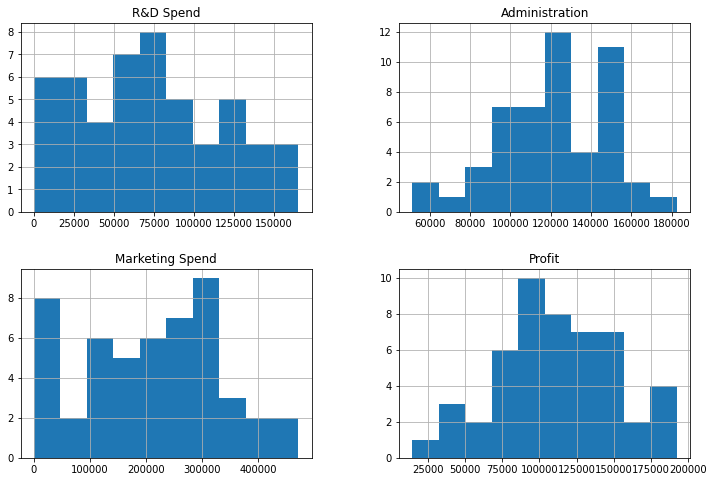

In [9]:
df.hist(bins=10, figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

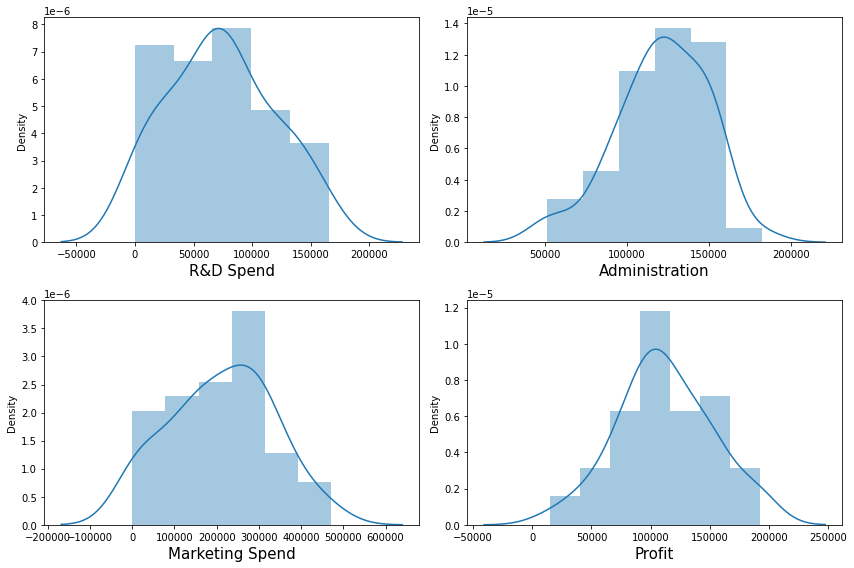

In [13]:
# Let's see how data is distributed for every column
import seaborn as sns

plt.figure(figsize = (12, 8))
plotnumber = 1
df1 = df.drop('State', axis=1)
for column in df1:
  if plotnumber <= 5:
    ax = plt.subplot(2, 2, plotnumber)
    sns.distplot(df1[column])
    plt.xlabel(column, fontsize = 15)
        
  plotnumber += 1
    
plt.tight_layout()
plt.show()

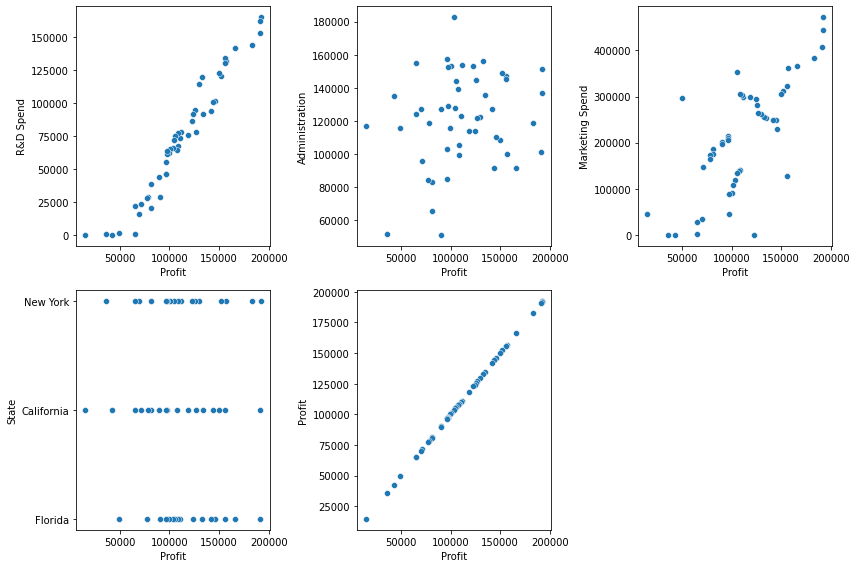

In [14]:
# Plotting `Profit` with remaining columns

plt.figure(figsize = (12, 8))
plotnumber = 1

for column in df:
    if plotnumber <= 5:
        ax = plt.subplot(2, 3, plotnumber)
        sns.scatterplot(x = df['Profit'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

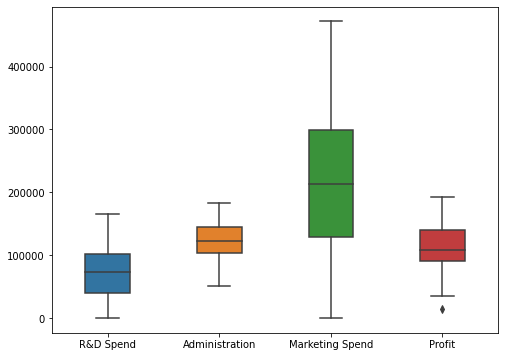

In [15]:
# looking for outliers using box plot

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, width = 0.4)
plt.show()

In [16]:
correllation = df.corr()
correllation['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

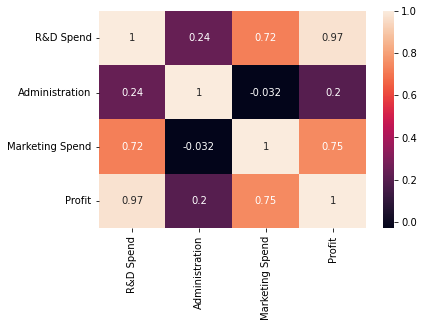

In [18]:
#import seaborn as sns
sns.heatmap(correllation, annot=True)

In [19]:
X= df.drop('Profit', axis=1)
y= df['Profit']

In [20]:
X.head(5)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 4) (15, 4) (35,) (15,)


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

trf1 = ColumnTransformer(transformers=[('ohe_state',OneHotEncoder(sparse=False),[3])
],remainder='passthrough')

#2rd Scaling
trf2 = ColumnTransformer([
    ('scale', StandardScaler(), slice(0,7))
])

#3th Feature selection
trf3 = SelectKBest(score_func=f_regression,k=2)

#4th Model
trf4 = LinearRegression()




### Create a Pipeline

In [34]:
from sklearn.pipeline import Pipeline,make_pipeline
pipe =  Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_state',
                                                  OneHotEncoder(sparse=False),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 SelectKBest(k=2,
                             score_func=<function f_regression at 0x7f5105216950>)),
                ('trf4', LinearRegression())])

In [35]:
y_pred = pipe.predict(X_test)

In [36]:
y_pred[:5]

array([126855.2361752 ,  82296.53163594,  97254.25284333,  46368.65783156,
       130089.77652378])

In [37]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9482660138683449
Test set score: 0.9527095741745952


### Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('the MAE of the model is {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('the MSE of the model is {:.2f}'.format(mean_squared_error(y_test,y_pred))) 
print('the RMSE of the model is {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('the Rsquared of the model is {:.2f} '.format(r2_score(y_test,y_pred)))

the MAE of the model is 6449.24
the MSE of the model is 66537675.85
the RMSE of the model is 8157.06
the Rsquared of the model is 0.95 


* The Rsquared value of the model implies that the input variable can explain more than 90% of the observed variation in the model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


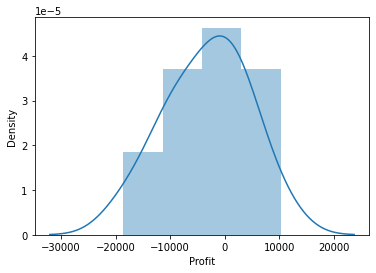

In [39]:
sns.distplot(y_pred - y_test)

# Conclusion

* There is no difference between our test score and train score, therefore there is no overfitting.
* Adjusting the value of f_regression k, to a higher number can reduce our test test and cuase overfitting.
* This model is good and can predict the profit of a start-up using features like amount spend on R&D and Marketing among others.


### Next task if there was any form of over fitting.
*  to repeat this model using data pepeline, using oneHotEncoding
*  checking for multicollinearity using `VIF` and correlation matrix.
*   Try our ridgecV and also LassoCV